# Predicting Hotel Reservation Cancellation: Binary Classification
**Author: Jiayan Li**

## I. Introduction

- **Background**: Cancellation of reservations can greatly influence the revenue of hotels. If businesses could predict the cancellations based on the features of reservations (such as room type reserved, room price, number of guests, etc.), it would imaginably help hotels cut losses and increase revenues. I want to build something practically helpful for this project to learn more about the application of machine learning in business settings.

    ![Alt text](https://static-new.lhw.com/HotelImages/Final/LW2766/lw2766_139953165_720x450.jpg)

- **ML Task**: Supervised Binary classification

- **Central Question**: Will the hotel guests cancel or honor the reservation?

- **Dataset Summary**: The csv file contains the different attributes of customers' reservation details. [total = 36275 (pos: 11885, neg: 24390), 17 features in total] 

- **Data Source**: https://www.kaggle.com/datasets/ahsan81/hotel-reservations-classification-dataset

- **Explanations of the variables**: 
    - Booking_ID: unique identifier of each booking
    - no_of_adults: Number of adults
    - no_of_children: Number of Children
    - no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
    - no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
    - type_of_meal_plan: Type of meal plan booked by the customer:
    - required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
    - room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
    - lead_time: Number of days between the date of booking and the arrival date
    - arrival_year: Year of arrival date
    - arrival_month: Month of arrival date
    - arrival_date: Date of the month
    - market_segment_type: Market segment designation.
    - repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
    - no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
    - no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
    - avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
    - no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
    - booking_status: Flag indicating if the booking was canceled or not.

#### Project Pipeline
The project is divided into the following parts:
<br/><br/>
- Exploratory Data Analysis
    - Exploring the DataFrame
    - Class Distribution
    - Exploring Feature Space & Check for Outliers
        - Hotel-related Features 
        - Time-related Features
        - Guest Features
<br/><br/>
- Data Preprocessing
    - Feature Engineering
    - Examine Colinearity
<br/><br/>
- Modeling (Decision Tree)
    - Using All 17 Features 
        - Oversampling vs. Undersampling
        - Parameter-tuning with/without GridSearch
    - Using Only 5 Primary Features
        - Parameter-tuning with/without GridSearch
<br/><br/>
- Result Analysis
    - Decision Tree Model Comparison (mainly using F1)
    - Visualizing the Tree

In [2]:
# Data Preprocessing
import pandas as pd
import numpy as np
import re
from imblearn.over_sampling import RandomOverSampler    # balancing samples
from imblearn.under_sampling import RandomUnderSampler
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import graphviz

# Modeling
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Model performance
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report, confusion_matrix

## II. Exploratory Data Analysis

In [3]:
path = 'data/Hotel Reservations.csv'

# load data to hr(hotel_reservations)_df
hr_df = pd.read_csv(path)

# read the first 10 rows
hr_df.head(10)

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
5,INN00006,2,0,0,2,Meal Plan 2,0,Room_Type 1,346,2018,9,13,Online,0,0,0,115.00,1,Canceled
6,INN00007,2,0,1,3,Meal Plan 1,0,Room_Type 1,34,2017,10,15,Online,0,0,0,107.55,1,Not_Canceled
7,INN00008,2,0,1,3,Meal Plan 1,0,Room_Type 4,83,2018,12,26,Online,0,0,0,105.61,1,Not_Canceled
8,INN00009,3,0,0,4,Meal Plan 1,0,Room_Type 1,121,2018,7,6,Offline,0,0,0,96.90,1,Not_Canceled
9,INN00010,2,0,0,5,Meal Plan 1,0,Room_Type 4,44,2018,10,18,Online,0,0,0,133.44,3,Not_Canceled


### Exploring the DataFrame

In [3]:
# check how many rows and columns the dataset has
print("The number of rows:",hr_df.shape[0])
print("The number of columns:", hr_df.shape[1])

The number of rows: 36275
The number of columns: 19


In [4]:
# check the data types and missing values
hr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

From above we can see that
- there seems like **no missing values**.

To make sure, I **added up** the null values below

In [5]:
# aggregated the null values
hr_df.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

From above we can see that
- there are **no missing values** in the dataset

In [6]:
# check the basic characteristics of the numeric data
hr_df.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


In [7]:
# how many unique values each variable has
hr_df.nunique()

Booking_ID                              36275
no_of_adults                                5
no_of_children                              6
no_of_weekend_nights                        8
no_of_week_nights                          18
type_of_meal_plan                           4
required_car_parking_space                  2
room_type_reserved                          7
lead_time                                 352
arrival_year                                2
arrival_month                              12
arrival_date                               31
market_segment_type                         5
repeated_guest                              2
no_of_previous_cancellations                9
no_of_previous_bookings_not_canceled       59
avg_price_per_room                       3930
no_of_special_requests                      6
booking_status                              2
dtype: int64

From above we can see that
- "Booking_ID" is a unique key of the dataset, which could probabely be dropped later.
- Variables like "avg_price_per_room", "lead_time", "no_of_previous_bookings_not_canceled", "no_of_week_nights" have more unique values

### Class Distribution

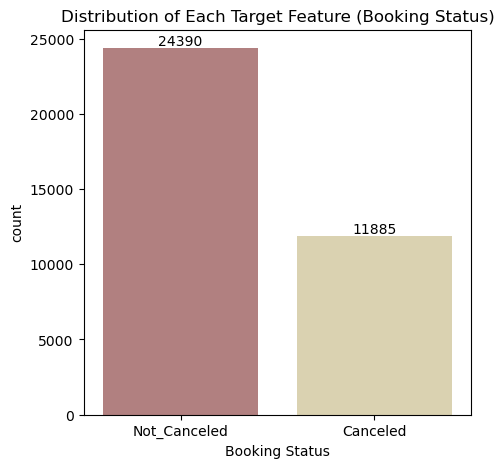

In [6]:
plt.figure(figsize=(5, 5))

# plot a histogram to show the class distribution
ax = sns.countplot(data=hr_df, x='booking_status', palette='pink')
ax.set_yticks(range(0, 30000, 5000))

# display the count on top of bar
for c in ax.containers:
    ax.bar_label(c)

# set the title and x-axis label
plt.title('Distribution of Each Target Feature (Booking Status)')
plt.xlabel('Booking Status')
plt.show();

From above we can see that
- the two classes are **not balanced**, which might need processing later.

### Exploring Feature Space & Check for Outliers
I divided all features into three kinds - hotel-related features (e.g., the reserved room type), time-related features (e.g., lead time), and guest features (e.g., number of adults). In each group, I explored the distribution of the feature space and checked for outliers.

In [24]:
# to faciliate the countplots of different variables
def eda_countplot(var_name):
    '''
    Generates countplot for exploratory data analysis
    Input:
        var_name: a string, the variable name
    '''

    sns.set_style("darkgrid")
    ax = sns.countplot(data=hr_df, x=var_name, hue='booking_status', 
                        fill=True, palette='pink')
    plt.title(f'{var_name} differentiated by booking status')
    plt.xlabel(var_name)

#### Hotel-related Features
- required_car_parking_space
- no_of_special_requests
- type_of_meal_plan
- room_type_reserved
- market_segment_type
- avg_price_per_room

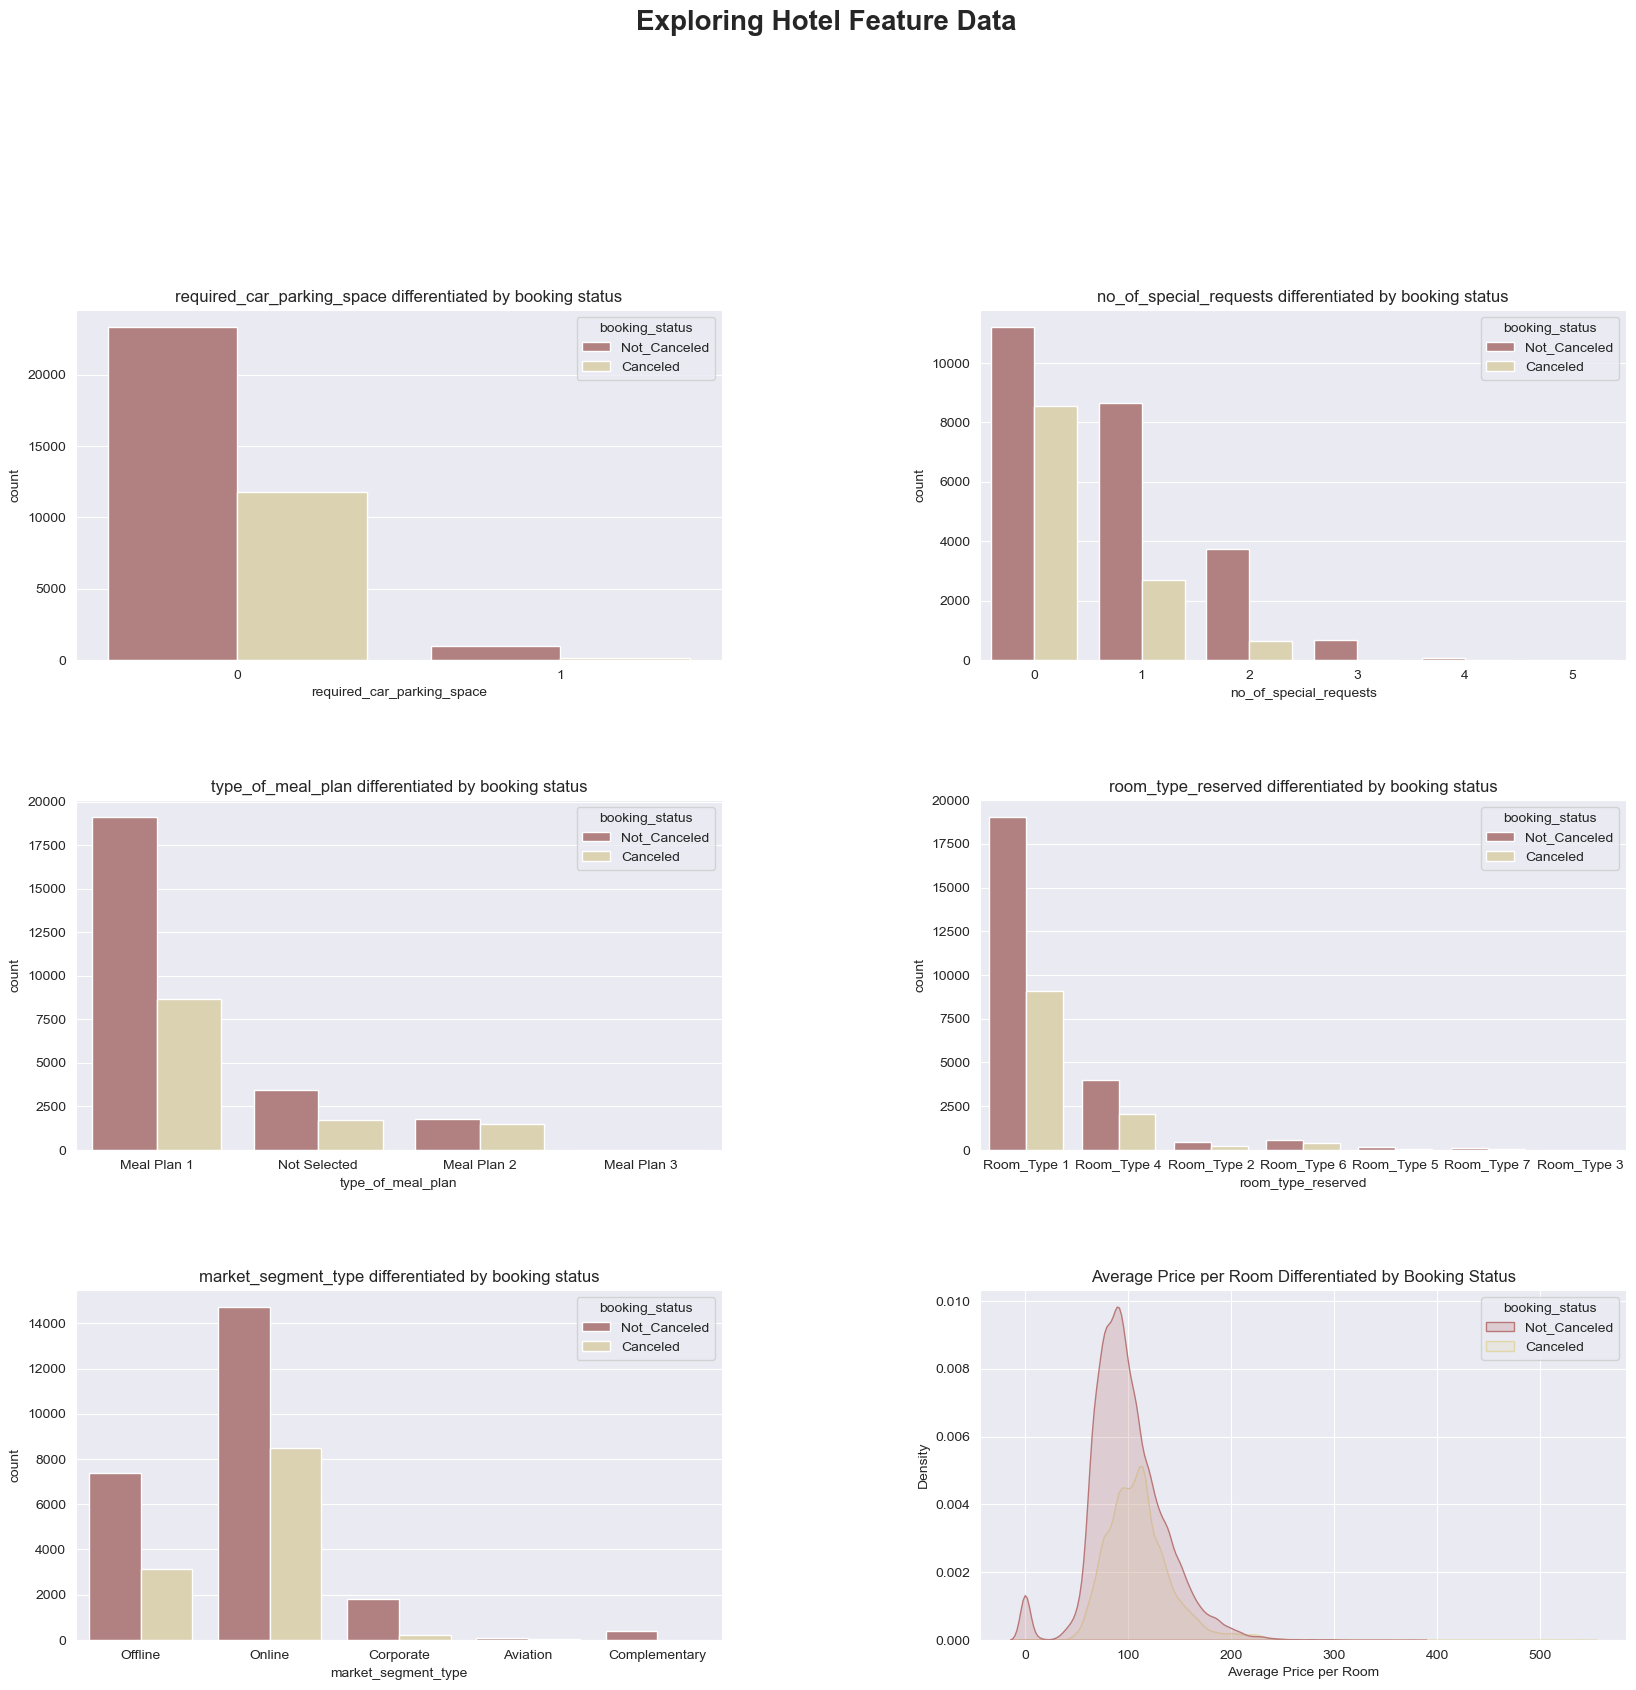

In [59]:
plt.figure(figsize=(20, 30))
plt.suptitle("Exploring Hotel Feature Data", fontweight="bold", fontsize=20)

# plot the distribution of whether car parking is required
plt.subplot(5, 2, 1)
eda_countplot('required_car_parking_space')

# plot the distribution of the number of special requests
plt.subplot(5, 2, 2)
eda_countplot('no_of_special_requests')

# plot the distribution of the type of meal plan
plt.subplot(5, 2, 3)
eda_countplot('type_of_meal_plan')

# plot the distribution of the room type
plt.subplot(5, 2, 4)
eda_countplot('room_type_reserved')

# plot the distribution of the market segment type
plt.subplot(5, 2, 5)
eda_countplot('market_segment_type')

# plot the distribution of average price per room
plt.subplot(5, 2, 6)
ax=sns.kdeplot(data=hr_df, x='avg_price_per_room', hue='booking_status', fill=True, palette='pink')
plt.title('Average Price per Room Differentiated by Booking Status')
plt.xlabel('Average Price per Room')

# set the spacing between subplots
plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.show();

From above we can see that
- guests who require car parking space are less likely to cancel, but the sample is too small to tell
- there might be some outliers
- for average price per room, peaks are slightly different for canceled and not canceled reservations

##### Check for Outliers
I only check for avg_price_per_room here, since other features seem to have discrete values or categorical values and have plausible values.

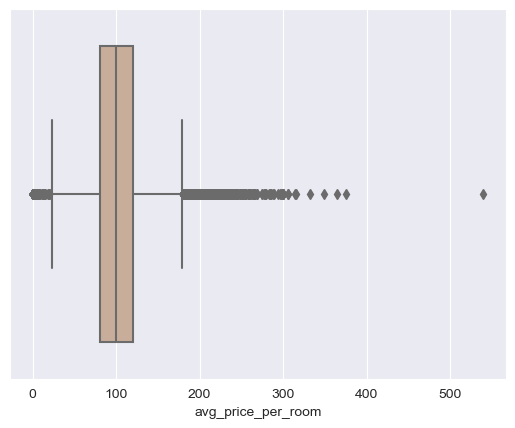

In [84]:
sns.set_style("darkgrid",{'axes.grid' : True})
sns.boxplot(x=hr_df['avg_price_per_room'], orient='h', palette='pink');

In [70]:
Q1 = hr_df['avg_price_per_room'].quantile(0.25)
Q3 = hr_df['avg_price_per_room'].quantile(0.75)
IQR = Q3 - Q1
lower_thresh = Q1 - 1.5*IQR
upper_thresh = Q3 + 1.5*IQR
Q1, Q3, lower_thresh, upper_thresh

(80.3, 120.0, 20.749999999999993, 179.55)

In [83]:
# number of outliers
len(hr_df[hr_df['avg_price_per_room']>180]) + len(hr_df[hr_df['avg_price_per_room']<20])

1675

For the following reasons, I decide not to remove outliers
1. 1675 is a large number of samples compared to our sample size (a little over 30,000)
2. Due to the nature of hotel industry, having a few much more expensive rooms is not out of norm, so I don't consider the data as human errors
3. Tree algorithms are robust to outliers

#### Time-related Features
- lead_time
- no_of_weekend_nights
- no_of_week_nights
- arrival_year
- arrival_month
- arrival_date

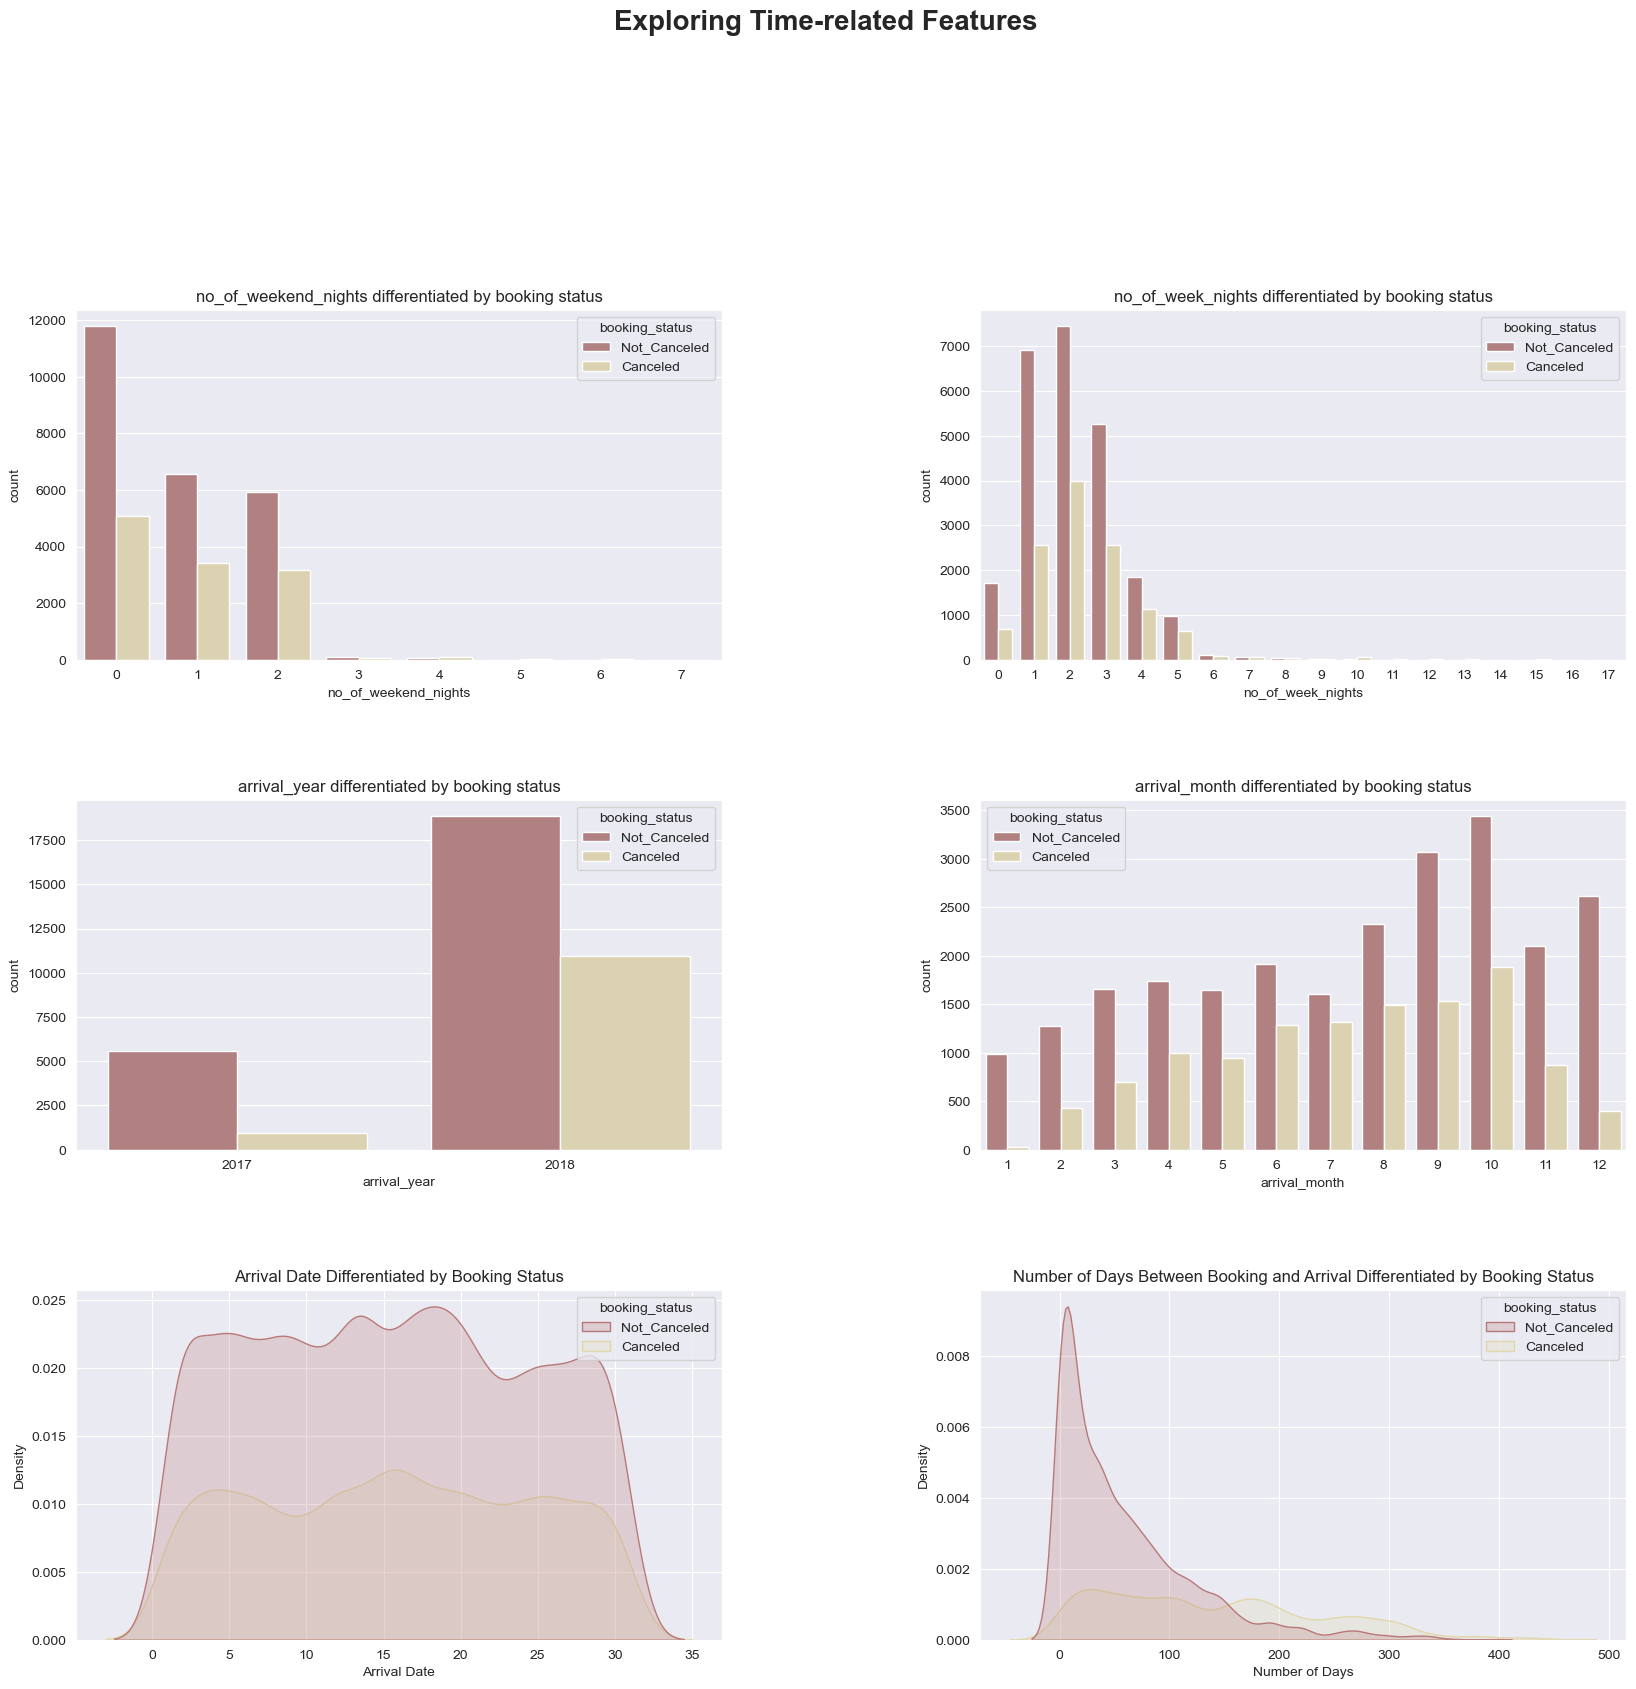

In [58]:
plt.figure(figsize=(20, 30))
plt.suptitle("Exploring Time-related Features", fontweight="bold", fontsize=20)

# plot the distribution of the number of weekend and weekday nights booked
plt.subplot(5, 2, 1)
eda_countplot('no_of_weekend_nights')
plt.subplot(5, 2, 2)
eda_countplot('no_of_week_nights')

# plot the distribution of the arrival year, month and date
plt.subplot(5, 2, 3)
eda_countplot('arrival_year')
plt.subplot(5, 2, 4)
eda_countplot('arrival_month')
# using kdeplot because a wider range of values are present for dates
plt.subplot(5, 2, 5)
ax=sns.kdeplot(data=hr_df, x='arrival_date', hue='booking_status', fill=True, palette='pink')
plt.title('Arrival Date Differentiated by Booking Status')
plt.xlabel('Arrival Date')

# plot the distribution of lead time (Days Between Booking and Arrival)
plt.subplot(5, 2, 6)
ax=sns.kdeplot(data=hr_df, x='lead_time', hue='booking_status', fill=True, palette='pink')
plt.title('Number of Days Between Booking and Arrival Differentiated by Booking Status')
plt.xlabel('Number of Days')

# set the spacing between subplots
plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.show();

From above we can see that
- the trends for lead time are different for canceled and not canceled reservations, I suspect that lead time might have a semi strong correlation with booking_status.

##### Check for outliers
Saving the categorical values, here we only check outliers for "lead_time"

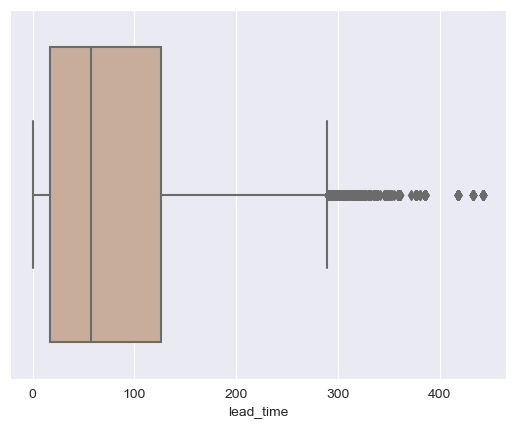

In [86]:
sns.set_style("darkgrid",{'axes.grid' : True})
sns.boxplot(x=hr_df['lead_time'], orient='h', palette='pink');

In [87]:
Q1 = hr_df['lead_time'].quantile(0.25)
Q3 = hr_df['lead_time'].quantile(0.75)
IQR = Q3 - Q1
lower_thresh = Q1 - 1.5*IQR
upper_thresh = Q3 + 1.5*IQR
Q1, Q3, lower_thresh, upper_thresh

(17.0, 126.0, -146.5, 289.5)

In [88]:
# number of outliers
len(hr_df[hr_df['lead_time']>290])

1290

Again, 1290 is not a small number of samples to throw out. Plus, reserving hotel rooms in far advance is not unheard of and it could play a large role in cancellations (it does, according to the correlation ranks which can be found later), so I'm not removing the outliers.

#### Guest Features
- no_of_previous_cancellations
- no_of_previous_bookings_not_canceled
- no_of_adults
- no_of_children
- repeated_guest

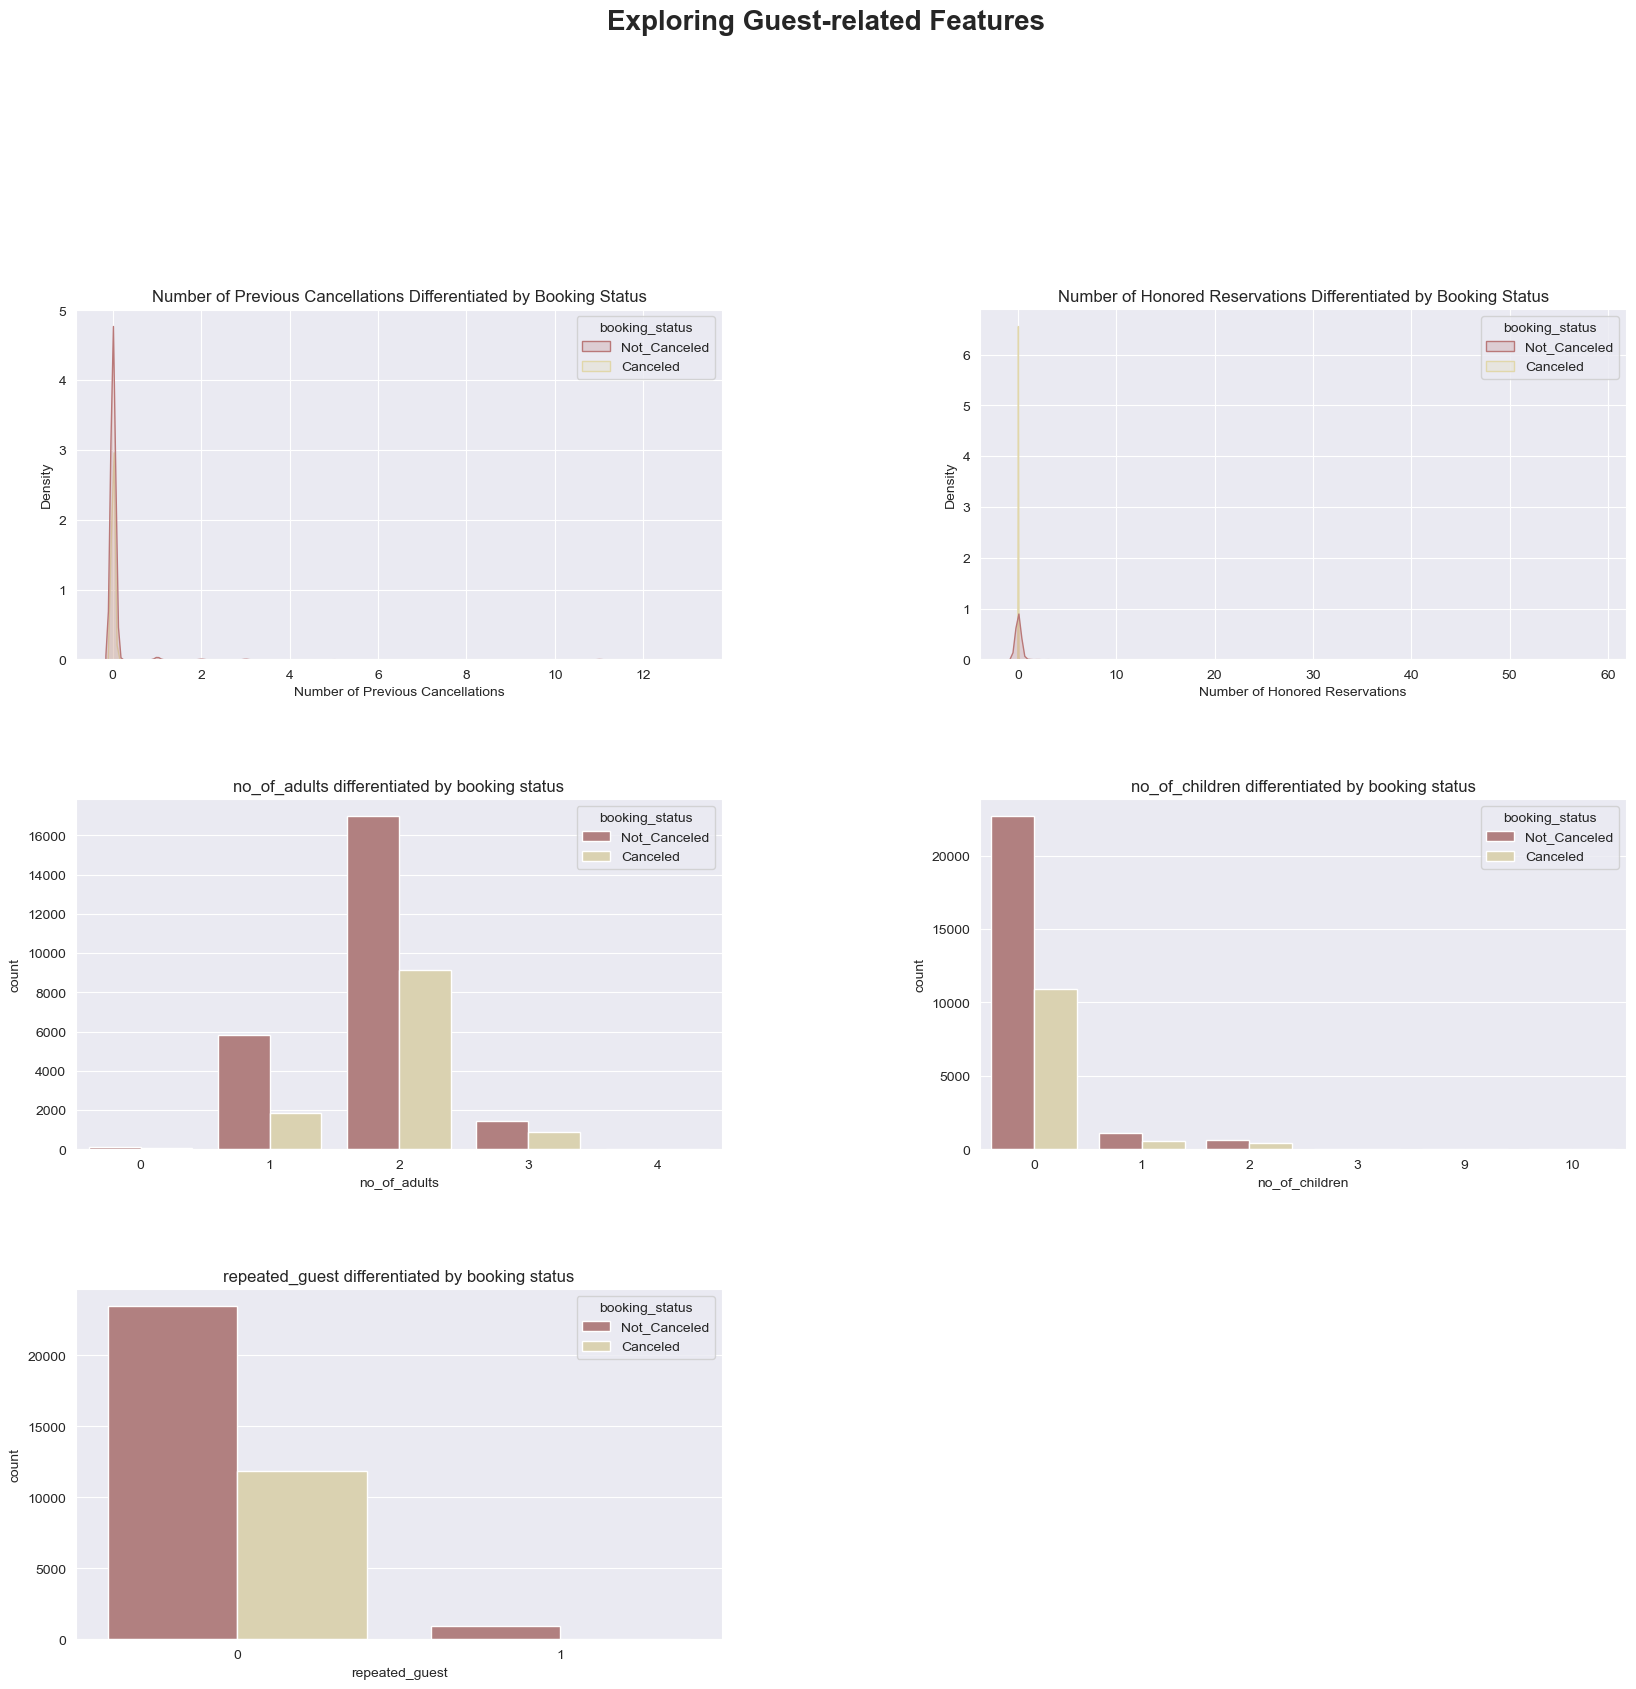

In [57]:
plt.figure(figsize=(20, 30))
plt.suptitle("Exploring Guest-related Features", fontweight="bold", fontsize=20)

# plot the distribution of number of previous cancellations andhonored reservations
plt.subplot(5, 2, 1)
ax=sns.kdeplot(data=hr_df, x='no_of_previous_cancellations', 
                hue='booking_status', fill=True, palette='pink')
plt.title('Number of Previous Cancellations Differentiated by Booking Status')
plt.xlabel('Number of Previous Cancellations')
plt.subplot(5, 2, 2)
ax=sns.kdeplot(data=hr_df, x='no_of_previous_bookings_not_canceled', 
                hue='booking_status', fill=True, palette='pink')
plt.title('Number of Honored Reservations Differentiated by Booking Status')
plt.xlabel('Number of Honored Reservations')

# plot the distribution of the number of adults and children
plt.subplot(5, 2, 3)
eda_countplot('no_of_adults')
plt.subplot(5, 2, 4)
eda_countplot('no_of_children')

plt.subplot(5, 2, 5)
eda_countplot('repeated_guest')

# set the spacing between subplots
plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.show();

From above we can see that:
- there might be outliers for number of previous cancellations and not cancelled reservations.
- repeated guests are less likely to cancel, but the sample is too small to tell.

0 adult seems wierd. Explore if it is bad data.

In [ ]:
hr_df[hr_df['no_of_adults']==0]['no_of_children'].value_counts()

2    133
3      5
1      1
Name: no_of_children, dtype: int64

Seems like there are instances where the reservation is only for children. It seems plausible—in other words, I don't consider it as a random error, so I did not drop the data.

##### Outliers
We've already proved that no_of_adults and no_of_children do not contain errors, so I don't consider them as outliers. Here I only check for no_of_previous_cancellations and no_of_previous_bookings_not_canceled

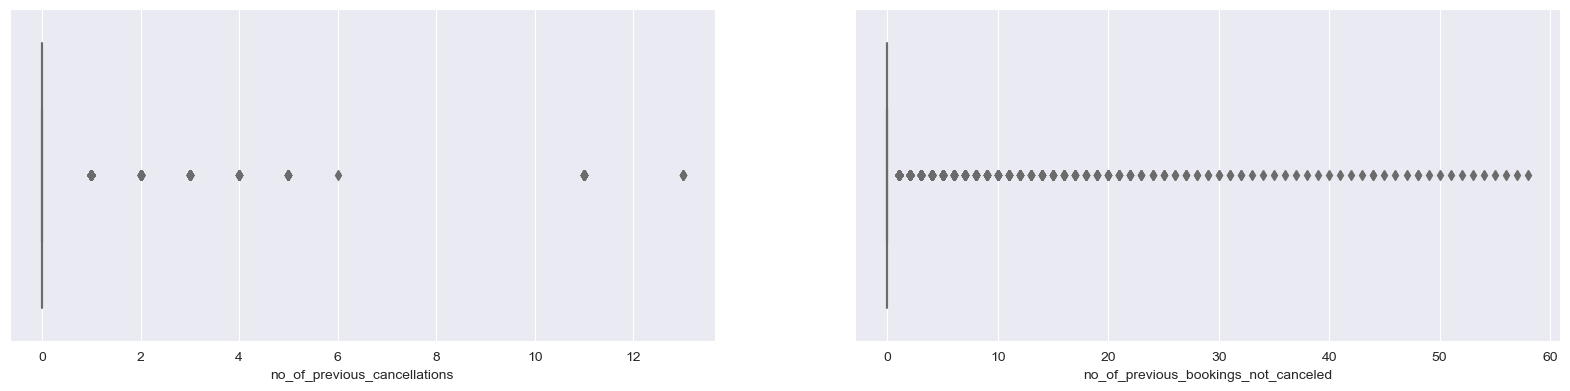

In [66]:
# make boxplots
plt.figure(figsize=(20, 25))
sns.set_style("darkgrid", {'axes.grid' : True})

plt.subplot(5, 2, 1)
sns.boxplot(x=hr_df['no_of_previous_cancellations'], orient='h', palette='pink');
plt.subplot(5, 2, 2)
sns.boxplot(x=hr_df['no_of_previous_bookings_not_canceled'], orient='h', palette='pink');

In [90]:
Q1 = hr_df['no_of_previous_cancellations'].quantile(0.25)
Q3 = hr_df['no_of_previous_cancellations'].quantile(0.75)
IQR = Q3 - Q1
lower_thresh = Q1 - 1.5*IQR
upper_thresh = Q3 + 1.5*IQR
Q1, Q3, lower_thresh, upper_thresh

(0.0, 0.0, 0.0, 0.0)

In [91]:
Q1 = hr_df['no_of_previous_bookings_not_canceled'].quantile(0.25)
Q3 = hr_df['no_of_previous_bookings_not_canceled'].quantile(0.75)
IQR = Q3 - Q1
lower_thresh = Q1 - 1.5*IQR
upper_thresh = Q3 + 1.5*IQR
Q1, Q3, lower_thresh, upper_thresh

(0.0, 0.0, 0.0, 0.0)

Interestingly, if we play by the rule, any value other than 0 is considered outliers. Removing "outliers" would equal entirely disregarding these two variables. To keep these variables for future use, I'm NOT throwing out outliers.

## III. Data Preprocessing

The column *Booking_ID* is only unique keys with no analysis value, so we could drop it.

In [101]:
hr_df.drop(columns=['Booking_ID'], inplace=True)
hr_df.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

### Feature Engineering

The columns—type_of_meal_plan, room_type_reserved, market_segment_type, booking_status—are object type, therefore **categorical** data, that need to be converted to **numerical** data for future analysis.

From the observation above, *booking_status* can be easily converted to numbers.

In [102]:
# process the column booking_status
# 1 represents canceled, 0 represents not canceled
hr_df['booking_status'].replace('Canceled', 1, inplace=True)
hr_df['booking_status'].replace('Not_Canceled', 0, inplace=True)
hr_df.head(3)

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,0
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,0
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,1


Then we process the rest three columns of categorical data

In [103]:
cat_cols = [col for col in hr_df.columns if hr_df[col].dtype == 'object']
print(cat_cols)

# Collect the unique values
cat_uniques = [hr_df[col].unique() for col in cat_cols]
print(cat_uniques)

['type_of_meal_plan', 'room_type_reserved', 'market_segment_type']
[array(['Meal Plan 1', 'Not Selected', 'Meal Plan 2', 'Meal Plan 3'],
      dtype=object), array(['Room_Type 1', 'Room_Type 4', 'Room_Type 2', 'Room_Type 6',
       'Room_Type 5', 'Room_Type 7', 'Room_Type 3'], dtype=object), array(['Offline', 'Online', 'Corporate', 'Aviation', 'Complementary'],
      dtype=object)]


Deal with ordinal data 'type_of_meal_plan' and 'room_type_reserved' first by keep the number as the value.

In [104]:
def find_num(cat_name):
    '''
    Find the integer out of a string of category name
    Input:
        cat_name: string, category name (e.g., Meal Plan 1)
    Output:
        int, number (e.g., 1)
    '''

    lst = re.findall('\d', cat_name)
    if lst == []:
        return 0
    else:
        return int(lst[0])

In [105]:
cat_to_num_mappings = []

for col, cat_names in zip(cat_cols[:2], cat_uniques):
    mapping = {}
    for _, cat in enumerate(cat_names):
        mapping[cat] = find_num(cat)
    cat_to_num_mappings.append(mapping)

print(cat_to_num_mappings)

[{'Meal Plan 1': 1, 'Not Selected': 0, 'Meal Plan 2': 2, 'Meal Plan 3': 3}, {'Room_Type 1': 1, 'Room_Type 4': 4, 'Room_Type 2': 2, 'Room_Type 6': 6, 'Room_Type 5': 5, 'Room_Type 7': 7, 'Room_Type 3': 3}]


Convert the last categorical (nominal) variable 'market_segment_type'

In [106]:
mapping = {cat_name: index for index, cat_name in enumerate(cat_uniques[2])}
cat_to_num_mappings.append(mapping)

cat_to_num_mappings

[{'Meal Plan 1': 1, 'Not Selected': 0, 'Meal Plan 2': 2, 'Meal Plan 3': 3},
 {'Room_Type 1': 1,
  'Room_Type 4': 4,
  'Room_Type 2': 2,
  'Room_Type 6': 6,
  'Room_Type 5': 5,
  'Room_Type 7': 7,
  'Room_Type 3': 3},
 {'Offline': 0,
  'Online': 1,
  'Corporate': 2,
  'Aviation': 3,
  'Complementary': 4}]

In [107]:
# map onto the dataframe
for col, mapping in zip(cat_cols, cat_to_num_mappings):
    hr_df[col] = hr_df[col].map(mapping)

In [108]:
# confirms that the conversion is successful
hr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          36275 non-null  int64  
 1   no_of_children                        36275 non-null  int64  
 2   no_of_weekend_nights                  36275 non-null  int64  
 3   no_of_week_nights                     36275 non-null  int64  
 4   type_of_meal_plan                     36275 non-null  int64  
 5   required_car_parking_space            36275 non-null  int64  
 6   room_type_reserved                    36275 non-null  int64  
 7   lead_time                             36275 non-null  int64  
 8   arrival_year                          36275 non-null  int64  
 9   arrival_month                         36275 non-null  int64  
 10  arrival_date                          36275 non-null  int64  
 11  market_segment_

In [110]:
# save to local for potential future use
hr_df.to_csv('data/processed_hr_data.csv')

In [25]:
hr_df = pd.read_csv('data/processed_hr_data.csv')

In [28]:
# drop the index column
hr_df.drop(labels='Unnamed: 0', axis=1, inplace=True)
hr_df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,1,0,1,224,2017,10,2,0,0,0,0,65.00,0,0
1,2,0,2,3,0,0,1,5,2018,11,6,1,0,0,0,106.68,1,0
2,1,0,2,1,1,0,1,1,2018,2,28,1,0,0,0,60.00,0,1
3,2,0,0,2,1,0,1,211,2018,5,20,1,0,0,0,100.00,0,1
4,2,0,1,1,0,0,1,48,2018,4,11,1,0,0,0,94.50,0,1


### Examine Collinearity

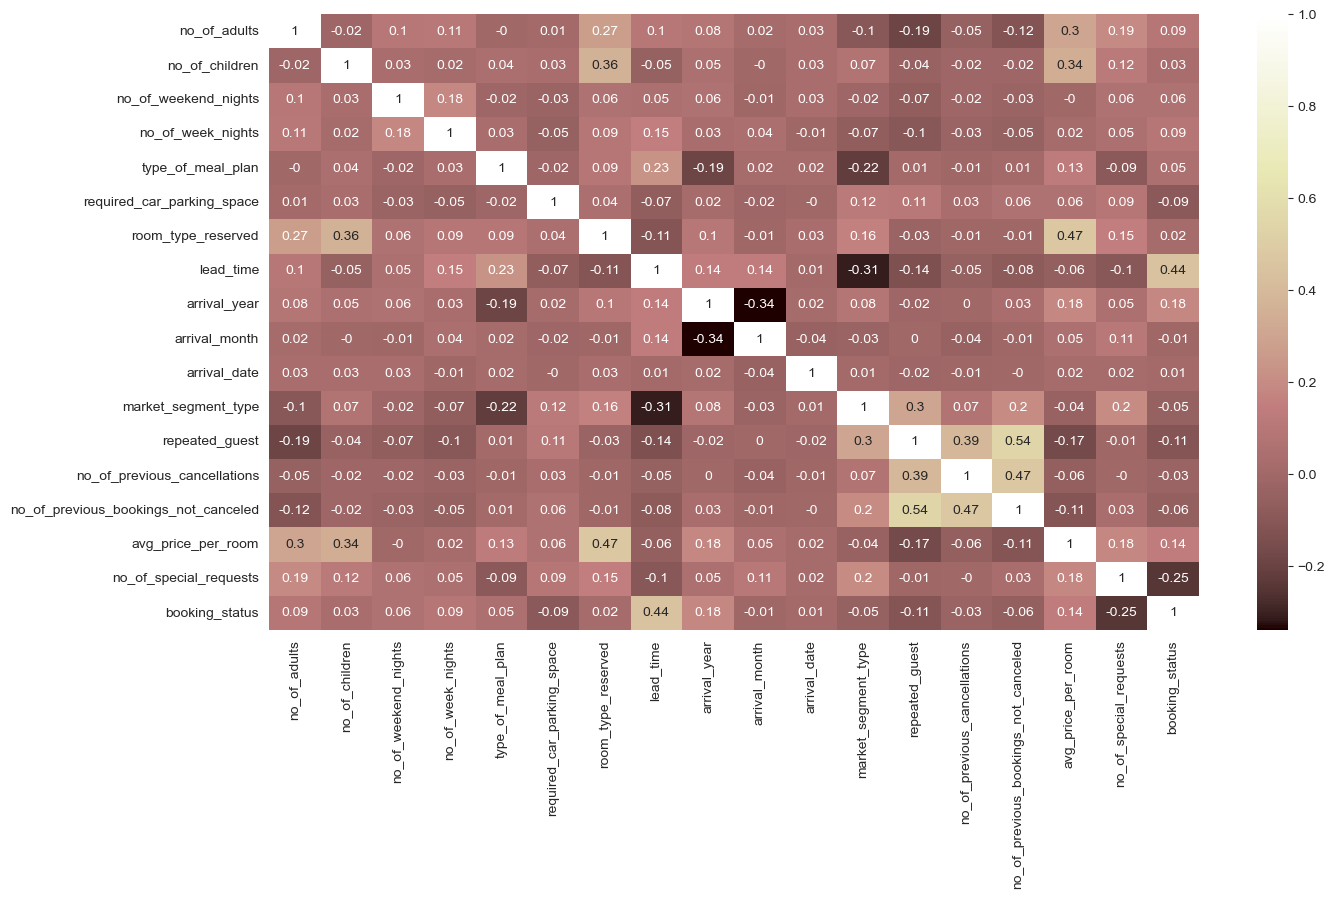

In [437]:
# Take a look at the correlations between numerical variables
corr = hr_df.corr(numeric_only=True).round(2)
plt.figure(figsize = (15,8))
sns.heatmap(corr, annot=True, cmap='pink');

From above, no strong correlations between variables can be observed.

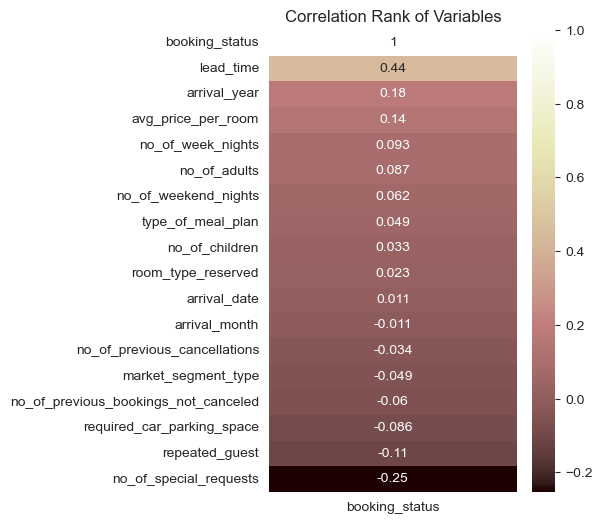

In [ ]:
# take a look at the ranking of correlations between the feature and our target
plt.figure(figsize=(4, 6), dpi=100)
sns.heatmap(hr_df.corr(numeric_only=True)[['booking_status']].sort_values(by='booking_status', ascending=False), annot = True, cmap='pink')
plt.title('Correlation Rank of Variables')
plt.show();

## IV. Modeling
Rather than scratch the surface of multiple models, I choose to dive deep into one of the most basic models — Decision Tree. I explored **9 models** in total with control and comparison.

In [40]:
# prepares the function to report the model performance
def model_performance(y_true, y_pred):
    '''
    Prints out statements and visualizes the results regarding the classifier performance
    Input:
        y_true: the y value in test datatest
        y_pred: the predicted y value based on the x in test dataset
    Output:
        printed statements and plots
    '''

    p_score = precision_score(y_true, y_pred)
    r_score = recall_score(y_true, y_pred)
    F1_score = f1_score(y_true, y_pred)
    cm = confusion_matrix(y_true, y_pred) 
    report = classification_report(y_true, y_pred)

    print(f"{'Precision Score':18} : {p_score:2f}")
    print(f"{'Recall Score':18} : {r_score:2f}")
    print(f"{'F1 Score':18} : {F1_score:2f}")
    
    # visualizing the confusion matrix
    fig, ax = plt.subplots(figsize=(3, 3))
    ax.imshow(cm, cmap='pink')
    ax.grid(False)
    ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted label 0', 'Predicted label 1'))
    ax.yaxis.set(ticks=(0, 1), ticklabels=('True label 0', 'True label 1'))
    for i in range(2):
        for j in range(2):
            ax.text(j, i, cm[i, j], ha='center', va='center', color='blue')
    plt.show()

    print(f"{'Classification Report':18} : \n{report}")

### Without pre-selecting features
This is the most straightforward way of training a Decision Tree. I only dropped the target value to begin with.

#### Oversampling

In [29]:
class_name = 'booking_status'

# assign all the variables other than the target to X
X = hr_df.drop(class_name, axis=1)

# get y
y = hr_df[class_name]

In [30]:
# 0: not canceled, 1: canceled
y.value_counts()

0    24390
1    11885
Name: booking_status, dtype: int64

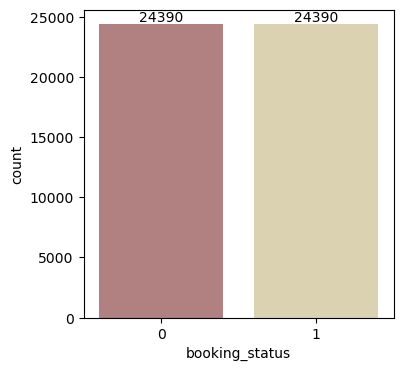

In [31]:
# Use over-sampling to balance the dataset
ros = RandomOverSampler(random_state = 0)
X, y = ros.fit_resample(X, y)
plt.figure(figsize=(4, 4))
ax = sns.countplot(x=y, palette='pink')

# display the count on top of bar
for c in ax.containers:
    ax.bar_label(c)

In [32]:
# check the counts after oversampling
y.value_counts()

0    24390
1    24390
Name: booking_status, dtype: int64

In [33]:
# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                random_state=42, shuffle=True)
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34146 entries, 10850 to 15795
Data columns (total 17 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          34146 non-null  int64  
 1   no_of_children                        34146 non-null  int64  
 2   no_of_weekend_nights                  34146 non-null  int64  
 3   no_of_week_nights                     34146 non-null  int64  
 4   type_of_meal_plan                     34146 non-null  int64  
 5   required_car_parking_space            34146 non-null  int64  
 6   room_type_reserved                    34146 non-null  int64  
 7   lead_time                             34146 non-null  int64  
 8   arrival_year                          34146 non-null  int64  
 9   arrival_month                         34146 non-null  int64  
 10  arrival_date                          34146 non-null  int64  
 11  market_segm

##### Decision Tree without GridSearch (all features, oversampled)

In [49]:
# Only specifying the random_state to ensure repeatability
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train, y_train)

# get the predicted target values
y_pred = dt_clf.predict(X_test)

The number of features: 17
Depth of the tree: 36
Decision Tree Classifier (Model1) Performance:
Precision Score    : 0.896579
Recall Score       : 0.937466
F1 Score           : 0.916567


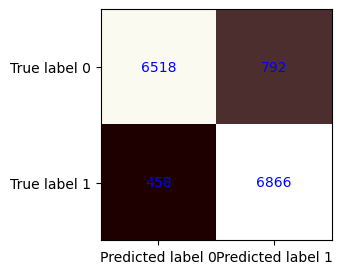

Classification Report : 
              precision    recall  f1-score   support

           0       0.93      0.89      0.91      7310
           1       0.90      0.94      0.92      7324

    accuracy                           0.91     14634
   macro avg       0.92      0.91      0.91     14634
weighted avg       0.92      0.91      0.91     14634



In [51]:
# assess the number of features modeled
print("The number of features:", dt_clf.max_features_)

# access the depth of the tree
print("Depth of the tree:", dt_clf.tree_.max_depth)

print("Decision Tree Classifier (Model1) Performance:")
model_performance(y_test, y_pred)

In [44]:
# check the feature importance of the model
ft_importance = pd.Series(dt_clf.feature_importances_, index=X.columns).sort_values(ascending=False)
ft_importance

lead_time                               0.376218
avg_price_per_room                      0.147469
no_of_special_requests                  0.090538
market_segment_type                     0.083310
arrival_date                            0.074148
arrival_month                           0.069027
no_of_week_nights                       0.046718
no_of_weekend_nights                    0.040448
no_of_adults                            0.024392
arrival_year                            0.013699
room_type_reserved                      0.010473
type_of_meal_plan                       0.010392
required_car_parking_space              0.007621
no_of_children                          0.004623
repeated_guest                          0.000368
no_of_previous_bookings_not_canceled    0.000367
no_of_previous_cancellations            0.000190
dtype: float64

##### Try pre-pruning the tree manually (all features, oversampled)

The number of features: 17
Decision Tree Classifier (Model2) Performance:
Precision Score    : 0.847039
Recall Score       : 0.743992
F1 Score           : 0.792179


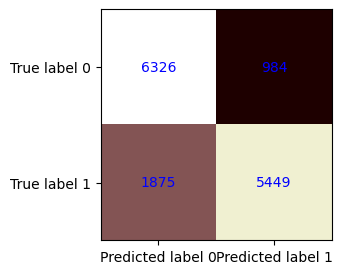

Classification Report : 
              precision    recall  f1-score   support

           0       0.77      0.87      0.82      7310
           1       0.85      0.74      0.79      7324

    accuracy                           0.80     14634
   macro avg       0.81      0.80      0.80     14634
weighted avg       0.81      0.80      0.80     14634



In [52]:
# pruning the tree by specifying the depth
dt_clf = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_clf.fit(X_train, y_train)

y_pred = dt_clf.predict(X_test)

# assess the number of features modeled
print("The number of features:", dt_clf.max_features_)

print("Decision Tree Classifier (Model2) Performance:")
model_performance(y_test, y_pred)

The number of features: 4
Depth of the tree: 39
Decision Tree Classifier (Model3) Performance:
Precision Score    : 0.902278
Recall Score       : 0.935418
F1 Score           : 0.918549


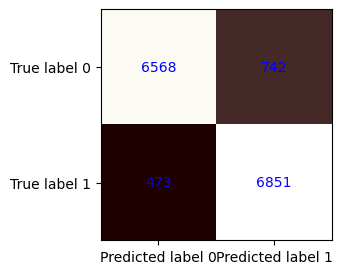

Classification Report : 
              precision    recall  f1-score   support

           0       0.93      0.90      0.92      7310
           1       0.90      0.94      0.92      7324

    accuracy                           0.92     14634
   macro avg       0.92      0.92      0.92     14634
weighted avg       0.92      0.92      0.92     14634



In [54]:
# pruning the tree by specifying the maximum features
dt_clf = DecisionTreeClassifier(max_features='sqrt', random_state=42)
dt_clf.fit(X_train, y_train)

# get the predicted target values
y_pred = dt_clf.predict(X_test)

# assess the number of features modeled
print("The number of features:", dt_clf.max_features_)

# access the depth of the tree
print("Depth of the tree:", dt_clf.tree_.max_depth)

print("Decision Tree Classifier (Model3) Performance:")
model_performance(y_test, y_pred)

Surprisingly, specifying max_features alone does NOT affect the model performance. It even boosts the performance.

Decision Tree Classifier (Model4) Performance:
Precision Score    : 0.717232
Recall Score       : 0.693337
F1 Score           : 0.705082


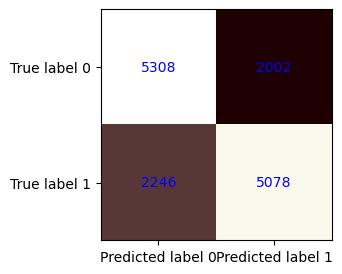

Classification Report : 
              precision    recall  f1-score   support

           0       0.70      0.73      0.71      7310
           1       0.72      0.69      0.71      7324

    accuracy                           0.71     14634
   macro avg       0.71      0.71      0.71     14634
weighted avg       0.71      0.71      0.71     14634



In [55]:
# pruning the tree by specifying the maximum features and the maximun depth
dt_clf_smp = DecisionTreeClassifier(max_features='sqrt', max_depth=5, random_state=42)
dt_clf_smp.fit(X_train, y_train)

# get the predicted target values
y_pred = dt_clf_smp.predict(X_test)

print("Decision Tree Classifier (Model4) Performance:")
model_performance(y_test, y_pred)

##### Decision Tree WITH GridSearch (all features, oversampled)

In [590]:
# specifying the parameters to try out
min_split = np.arange(2, 8)
max_dpt = np.arange(3, 15)
crt = ['entropy', 'gini', 'log_loss']
param_d = {'min_samples_split': min_split, 'max_depth': max_dpt, 'criterion': crt}

model = DecisionTreeClassifier()
grid_dt = GridSearchCV(estimator=model, param_grid=param_d)
grid_dt.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini', 'log_loss'],
                         'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                         'min_samples_split': array([2, 3, 4, 5, 6, 7])})

In [576]:
print(grid_dt.best_params_)

{'criterion': 'gini', 'max_depth': 15, 'min_samples_split': 2}


In [56]:
# model training
dt_grid_clf = DecisionTreeClassifier(criterion='gini', min_samples_split=2, max_depth=15, random_state=42)
dt_grid_clf.fit(X_train, y_train)

# get the predicted target values
y_pred = dt_grid_clf.predict(X_test)

The number of features: 17
Depth of the tree: 15
Decision Tree Classifier (Model5) Performance:
Precision Score    : 0.875987
Recall Score       : 0.894047
F1 Score           : 0.884925


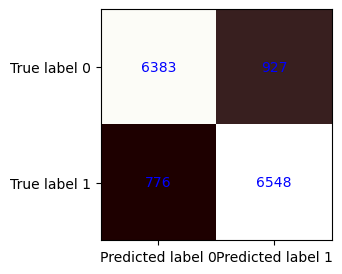

Classification Report : 
              precision    recall  f1-score   support

           0       0.89      0.87      0.88      7310
           1       0.88      0.89      0.88      7324

    accuracy                           0.88     14634
   macro avg       0.88      0.88      0.88     14634
weighted avg       0.88      0.88      0.88     14634



In [58]:
# assess the number of features modeled
print("The number of features:", dt_grid_clf.max_features_)

# access the depth of the tree
print("Depth of the tree:", dt_grid_clf.tree_.max_depth)

print("Decision Tree Classifier (Model5) Performance:")
model_performance(y_test, y_pred)

In [677]:
# check the feature importance of the model
ft_importance = pd.Series(dt_grid_clf.feature_importances_, index=X.columns).sort_values(ascending=False)
ft_importance

lead_time                               0.401075
avg_price_per_room                      0.131934
no_of_special_requests                  0.115155
market_segment_type                     0.105636
arrival_month                           0.067693
arrival_date                            0.046074
no_of_weekend_nights                    0.034863
no_of_week_nights                       0.032810
no_of_adults                            0.023683
arrival_year                            0.017477
required_car_parking_space              0.009190
room_type_reserved                      0.005927
type_of_meal_plan                       0.005579
no_of_children                          0.002125
no_of_previous_bookings_not_canceled    0.000274
repeated_guest                          0.000265
no_of_previous_cancellations            0.000241
dtype: float64

The 5 top features—"lead_time", "avg_price_per_room", "no_of_special_requests", "market_segment_type", and "arrival_month"—are almost the same as the feature rankings from the decision tree with no parameter tuning (albeit with different weights). I'll use these 5 features in the modeling part **Using Only Primary Features** later.

#### Undersampling

In [59]:
class_name = 'booking_status'

# assign all the variables other than the target to X
X = hr_df.drop(class_name, axis=1)

# get y
y = hr_df[class_name]

In [60]:
# 0: not canceled, 1: canceled
y.value_counts()

0    24390
1    11885
Name: booking_status, dtype: int64

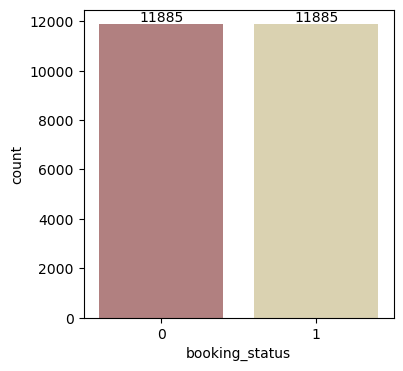

In [61]:
# Use undersampling to balance the dataset
ros = RandomUnderSampler(random_state=0)
X, y = ros.fit_resample(X, y)
plt.figure(figsize=(4, 4))
ax = sns.countplot(x=y, palette='pink')

# display the count on top of bar
for c in ax.containers:
    ax.bar_label(c)

In [62]:
# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                random_state=42, shuffle=True)
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16639 entries, 1576 to 23654
Data columns (total 17 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          16639 non-null  int64  
 1   no_of_children                        16639 non-null  int64  
 2   no_of_weekend_nights                  16639 non-null  int64  
 3   no_of_week_nights                     16639 non-null  int64  
 4   type_of_meal_plan                     16639 non-null  int64  
 5   required_car_parking_space            16639 non-null  int64  
 6   room_type_reserved                    16639 non-null  int64  
 7   lead_time                             16639 non-null  int64  
 8   arrival_year                          16639 non-null  int64  
 9   arrival_month                         16639 non-null  int64  
 10  arrival_date                          16639 non-null  int64  
 11  market_segme

##### Decision Tree without GridSearch (all features & undersampled)

In [63]:
# Only specifying the random_state to ensure repeatability
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train, y_train)

y_pred = dt_clf.predict(X_test)

The number of features: 17
Depth of the tree: 32
Decision Tree Classifier (Model6) Performance:
Precision Score    : 0.845255
Recall Score       : 0.841507
F1 Score           : 0.843377


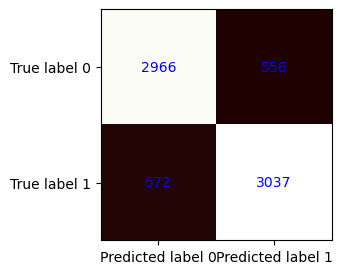

Classification Report : 
              precision    recall  f1-score   support

           0       0.84      0.84      0.84      3522
           1       0.85      0.84      0.84      3609

    accuracy                           0.84      7131
   macro avg       0.84      0.84      0.84      7131
weighted avg       0.84      0.84      0.84      7131



In [65]:
# assess the number of features modeled
print("The number of features:", dt_clf.max_features_)

# access the depth of the tree
print("Depth of the tree:", dt_clf.tree_.max_depth)

print("Decision Tree Classifier (Model6) Performance:")
model_performance(y_test, y_pred)

##### Decision Tree WITH GridSearch (all features & undersampled)

In [623]:
# specifying the parameters to try out
min_split = np.arange(2, 8)
max_dpt = np.arange(3, 15)
crt = ['entropy', 'gini', 'log_loss']
param_d = {'min_samples_split': min_split, 'max_depth': max_dpt, 'criterion': crt}

model = DecisionTreeClassifier()
grid_dt = GridSearchCV(estimator=model, param_grid=param_d)
grid_dt.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini', 'log_loss'],
                         'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                         'min_samples_split': array([2, 3, 4, 5, 6, 7])})

In [624]:
print(grid_dt.best_params_)

{'criterion': 'gini', 'max_depth': 12, 'min_samples_split': 3}


In [66]:
dt_grid_clf = DecisionTreeClassifier(criterion='entropy', min_samples_split=3, max_depth=12, random_state=42)
dt_grid_clf.fit(X_train, y_train)

y_pred = dt_grid_clf.predict(X_test)

The number of features: 17
Depth of the tree: 12
Decision Tree Classifier with GridSearch Performance:
Precision Score    : 0.861263
Recall Score       : 0.827376
F1 Score           : 0.843980


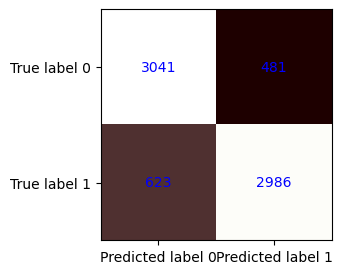

Classification Report : 
              precision    recall  f1-score   support

           0       0.83      0.86      0.85      3522
           1       0.86      0.83      0.84      3609

    accuracy                           0.85      7131
   macro avg       0.85      0.85      0.85      7131
weighted avg       0.85      0.85      0.85      7131



In [68]:
# assess the number of features modeled
print("The number of features:", dt_grid_clf.max_features_)

# access the depth of the tree
print("Depth of the tree:", dt_grid_clf.tree_.max_depth)

print("Decision Tree Classifier with GridSearch Performance:")
model_performance(y_test, y_pred)

### Using Only Primary Features
The goals here are to train a **simplified tree with relatively good performance**.

As with only 4 features, the model outperforms the no-pruning decision tree. I assume that some features are more important than others. So, I decide to explore a **simplified** decision tree with only a few primary features that could perform reasonably well. By doing this, I hope to:
- visualize the decision tree and make it more interpretable
- simplify the future data collection pipeline (since less features are needed)
<br/><br/>

Because with no pruning, no gridsearch (essentially no tuning of parameters), oversampling performs substantially better, I use oversampling to explore using only primary features.

#### Using the top 5 features from feature importance ranking from oversampling (gridsearch)
The features are:
- "lead_time"
- "avg_price_per_room"
- "no_of_special_requests"
- "market_segment_type"
- "arrival_month"

In [69]:
class_name = 'booking_status'
top_features = ["lead_time", 
                "avg_price_per_room",
                "no_of_special_requests", 
                "market_segment_type",
                "arrival_month"]

# still using the same y (book_status)
y = hr_df[class_name]

# using only 5 variables as feature X 
X_top = hr_df[top_features]

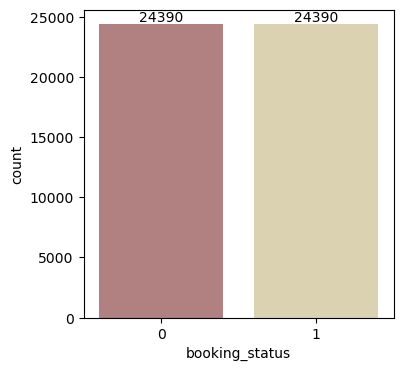

In [70]:
# Use over-sampling to balance the dataset
ros = RandomOverSampler(random_state=0)
X, y = ros.fit_resample(X_top, y)
plt.figure(figsize=(4, 4))
ax = sns.countplot(x=y, palette='pink')

# display the count on top of bar
for c in ax.containers:
    ax.bar_label(c)

In [71]:
# Splitting data, s represents simplified
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X, y, test_size=0.3, 
                                                random_state=42, shuffle=True)
# check if we've oversampled and selected only the 5 features
X_train_s.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34146 entries, 10850 to 15795
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   lead_time               34146 non-null  int64  
 1   avg_price_per_room      34146 non-null  float64
 2   no_of_special_requests  34146 non-null  int64  
 3   market_segment_type     34146 non-null  int64  
 4   arrival_month           34146 non-null  int64  
dtypes: float64(1), int64(4)
memory usage: 1.6 MB


##### Manually tuning max_depth to 5 (5 features, oversampled)

In [72]:
# model training
dt_clf = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_clf.fit(X_train_s, y_train_s)

# get the predicative values
y_pred_s = dt_clf.predict(X_test_s)

Decision Tree Classifier (Model 8) Performance:
Precision Score    : 0.832404
Recall Score       : 0.754096
F1 Score           : 0.791317


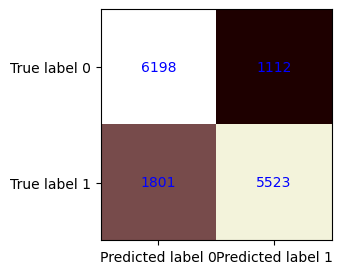

Classification Report : 
              precision    recall  f1-score   support

           0       0.77      0.85      0.81      7310
           1       0.83      0.75      0.79      7324

    accuracy                           0.80     14634
   macro avg       0.80      0.80      0.80     14634
weighted avg       0.80      0.80      0.80     14634



In [74]:
print("Decision Tree Classifier (Model 8) Performance:")
model_performance(y_test_s, y_pred_s)

In [75]:
# it's a simplified tree with relatively good performance
# save the tree to the variable dt_simplifed1 for visualization
dt_simplifed = dt_clf

##### GridSearch (5 features, oversampled)

In [682]:
# specifying the parameters to try out
min_split = np.arange(2, 8)
max_dpt = np.arange(3, 8)
crt = ['entropy', 'gini', 'log_loss']
param_d = {'min_samples_split': min_split, 'max_depth': max_dpt, 'criterion': crt}

model = DecisionTreeClassifier()
grid_dt = GridSearchCV(estimator=model, param_grid=param_d)
grid_dt.fit(X_train_s, y_train_s)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini', 'log_loss'],
                         'max_depth': array([3, 4, 5, 6, 7]),
                         'min_samples_split': array([2, 3, 4, 5, 6, 7])})

In [683]:
# check the result of the search
print(grid_dt.best_params_)

{'criterion': 'gini', 'max_depth': 7, 'min_samples_split': 2}


In [76]:
# model training
dt_grid_clf = DecisionTreeClassifier(criterion='gini', min_samples_split=2, max_depth=7, random_state=42)
dt_grid_clf.fit(X_train_s, y_train_s)

# get the predicted y
y_pred_s = dt_grid_clf.predict(X_test_s)

Decision Tree Classifier (Model9) Performance:
Precision Score    : 0.822434
Recall Score       : 0.813900
F1 Score           : 0.818144


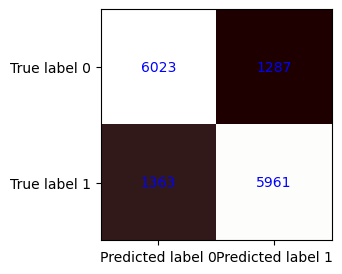

Classification Report : 
              precision    recall  f1-score   support

           0       0.82      0.82      0.82      7310
           1       0.82      0.81      0.82      7324

    accuracy                           0.82     14634
   macro avg       0.82      0.82      0.82     14634
weighted avg       0.82      0.82      0.82     14634



In [78]:
print("Decision Tree Classifier (Model9) Performance:")
model_performance(y_test_s, y_pred_s)

It seems that having a larger depth (7 vs 5) enhances the model performance by about 2%

## V. Result Analysis

#### Decision Tree Model Comparison
We use F1 score as the comparison metric here, as it combines precision and recall scores of a model.

- Without pre-selecting features 
<br/><br/>
    - Oversampling
        - No GridSearch
            - No Pruning - F1: 0.917 (depth: 36) --> model 1
            - Control max_depth=5 - F1: 0.792 (depth: 5) --> model 2
            - Control max_features='sqrt' - F1: 0.919 (depth: 39, num_features=4) --> model 3
            - Control both max depth and features - F1: 0.705 (depth: 5) --> model 4
        - GridSearch - F1: 0.885 (depth: 15)  --> model 5
<br/><br/>
    - Undersampling
        - No GridSearch, No Pruning - F1: 0.843 (depth: 32)  --> model 6
        - GridSearch - F1: 0.844 (depth: 12) --> model 7
<br/><br/>

Surprisingly, tuning max_features alone - coupled with oversampling - achieves the best result of a F1 score of 0.919 (model 3).
<br/><br/>
Balancing the computational expenses and performance, oversampling with GridSearch achieves the well-performing tree with a F1 score of 0.885 (model 5).


- Using only 5 primary features identified by feature importance
<br/><br/>
    - Oversampling
        - No GridSearch, set max_depth=5 - F1: 0.791  -> model 8
        - GridSearch - F1: 0.818 (depth=7) -> model 9

Remember, our goal here is to have an interpretable simple tree that is computationally and data cheap. F1=0.791 seems like a reasonably good result for a model with only 5 depth and 5 features to work on. In comparison, I would prefer model 8 to model 9 as it saves 2 depths but only sacrifices ~0.02 F1 score.

#### Visualizing the Tree
I choose to visualize the simpliest tree with reasonably good performance here. The tree uses **ONLY 5** features and has a depth of 5. Regarding performance, it has 83.24% precision, 75.41% recall, and a F1 score of 0.791.

As the hotel business doesn't really demand extremely high precision/recall, this tree is computationally cheap and only requires collecting 5 feature data, plus the target data.

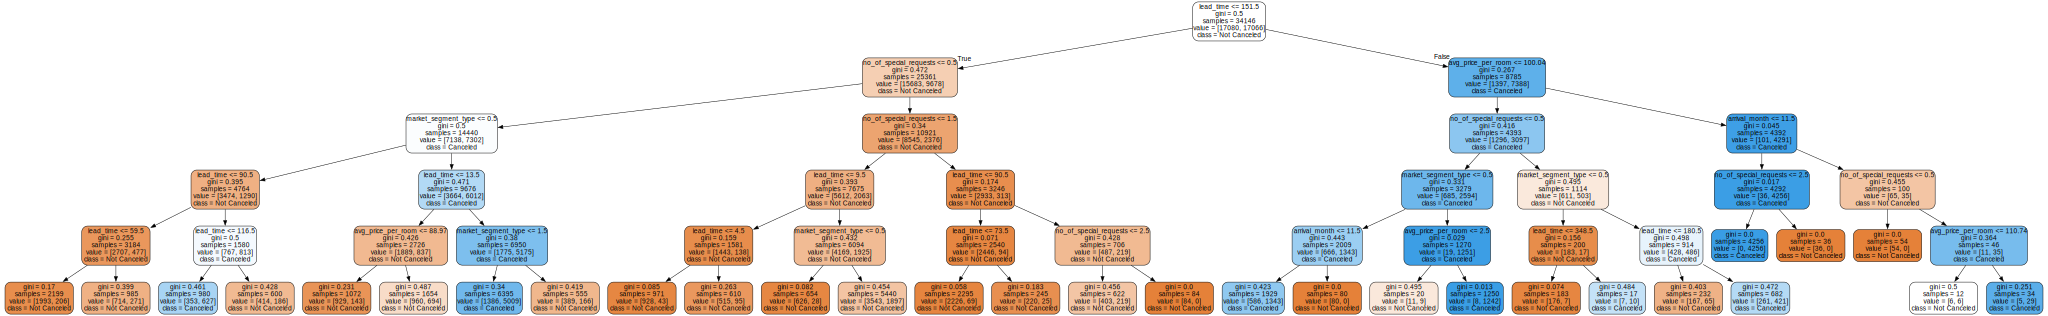

In [123]:
dot_data = tree.export_graphviz(dt_simplifed,
                                out_file=None,
                                feature_names=top_features,
                                class_names=['Not Canceled', 'Canceled'],
                                filled=True,
                                rounded=True)
graph = graphviz.Source(dot_data)  
graph 

#### Example where the model fails: simplified Tree (model 8)

In [84]:
# take a look at the comparison between the first 10 predicted and true values
y_pred_10 = dt_simplifed.predict(X_test_s[:10])
y_pred_10 != y_test_s[:10]

5159     False
31245    False
34778    False
21287    False
16145    False
38151     True
38648    False
40304    False
15952    False
39530    False
Name: booking_status, dtype: bool

In [174]:
# find out about the features
print(X_test_s.loc[38151])
print('True value:', y_test_s.loc[38151])

lead_time                  88.0
avg_price_per_room        132.3
no_of_special_requests      1.0
market_segment_type         1.0
arrival_month              10.0
Name: 38151, dtype: float64
True value: 1


#### Error Analysis

1. For the simplified tree (model 8) specificly, I think it is almost certainly a case of **under-fitting**. The error could stem from
- Not using all the features:
Of course using only the primary 5 features have its drawback. Unavoidably, basing the decison on less information would lead to more errors.
- Not deep enough: 
Compared to other trees, this simplified tree has the lowest depth, which could be the simple most damning factor.

2. Also, most surprisingly, the best performing tree has only **4 features** out of 17 to work with (F1: 0.919, model 3) - even better that a no-pruning tree (model 1). It says a lot about the over-fitting issues for trees with all of the features.

3. An interesting discovery is: oversampling generates better results with other factors/parameters in control. So, I would suspect that undersampling loses some feature information in the process.

## Conclusion

The **goal** of this project is to explore **Decision Tree binary classifiers** and train a predictor for cancellations of hotel reservations based on the reservation information. Except for model performance, a big part of this project is to find a simple model for business purposes.
<br/><br/>
The dataset used in the project has 17 features - such as number of adults, arrival year, number of previous cancellations, etc. - and a unbalanced class distribution (24390 vs. 11885).
<br/><br/>

### About Outliers
In this project, I chose not to delete data for outliers, for which I've outlined the reasons in the specific parts. But generally, the logistics are:
1. None of the outliers are obviously caused by random errors. In other words, the outlier values all seem to make sense.
2. Deleting outliers according to the quantiles would lead to too much of data loss. Over 1k samples are a significant amount compared to the 30k sample size. In some cases, throwing out outliers would cause the feature to have only one value, so the feature would directly become useless.
3. Tree algorithms are robust to outliers. Outliers will most likely have a negligible effect.

### Notes on Model Tuning 

For this model's purposes, model performance is NOT the sole golden standard. A great advantage of Decision Tree is the **interpretability**. Decision Tree is not blackboxes like other ML algorithms. Therefore, I want to explore a not-too-complex model that would allow users to interpret the tree. 

By controlling and experimenting with different conditions, there were a few things that I explored:<br/><br/>
1. Compare oversampling and undersampling:
Oversampling performs better on this task - my guess is that it creates more data points for the model to learn. However, it might vary on a case-to-case basis.
<br/><br/>
2. Try both manual tuning and GridSearch: 
In my attempt, manually controlling max_features achieves the best results, but it might be that the tree is much deeper and therefore more complex than the GridSearch tree (I controled the maximum depth in GridSearch to be 15).
<br/><br/>
3. Explore a simplified tree and visualize it:
In business settings, sometimes it's not about achieve 100% accuracy (assume it's possible) - costs are also an important factor to consider. Besides, more complex trees are more like black boxes, while simpler trees might give us insights on the reasons behind target classes. Visualizing a giant tree is computationally expensive and not that readible, while our simplified tree is much easier to read.

### Final Thoughts
Machine learning tasks often serve some purpose - in this case, business purposes where costs matter. Because costs of collecting and storing data would probably matter for hotels, I tried to only use 5 features to train the model. In some tasks, training a model with the best performance is all that matters, but it is not always the case. For example, for social scientists, machine learning could be a tool to get somewhere, while it could also offer some insights into the social reality.